<div style="background-color: #00008B; padding: 20px;">
    <h1 style="font-size: 100px; color: #ffffff;">KNN for Classification</h1>
</div>

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

C:\Users\rasou\anaconda_2024\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


<div style="background-color:#f0f8ff; padding: 20px; border: 2px solid #4682b4; border-radius: 10px;">

### 🌟 <span style="color:#4682b4;">KNN Classification</span>

**K-Nearest Neighbors (KNN)** is a simple and popular supervised learning algorithm used for classification tasks. It classifies a new data point based on the similarity of data points in the training set.

#### **How KNN Works**:
1. **Choose k**: Determine the number of neighbors (k) to consider.
2. **Calculate distances**: Compute the distance (usually Euclidean distance) between the new data point and all points in the training dataset.
   $$
   d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
   $$
3. **Find nearest neighbors**: Select the k nearest neighbors based on the computed distances.
4. **Majority vote**: Assign the label that is most common among the k nearest neighbors to the new data point.

#### **Applying KNN to Classify the Iris Dataset** 🌸

We will apply the KNN algorithm to classify the famous **Iris dataset**. The Iris dataset consists of 150 samples of iris flowers, each described by four features: sepal length, sepal width, petal length, and petal width. The goal is to classify the iris flowers into three species: setosa, versicolor, and virginica.

<div style="border: 2px solid #4CAF50; background-color: #f0fff0; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <b>Note:</b> 
    To better understand and see the details of the KNN algorithm, we will write the code from scratch without using `sklearn`.
</div>

### **Step-by-Step Implementation** 📝

1. **Data Preparation**: Load the Iris dataset and split it into features (X) and labels (y).
2. **Train-Test Split**: Divide the dataset into training and testing sets.
3. **Distance Calculation**: Define a function to calculate the Euclidean distance between data points.
4. **KNN Algorithm**: Implement the KNN algorithm from scratch.
5. **Prediction and Evaluation**: Predict the classes for the test set and evaluate the accuracy of the model.

<div style="border: 2px solid #FF5733; background-color: #fff0f0; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <b>Explanation:</b> 
    The KNN classifier calculates the Euclidean distance between the test point and all the points in the training set. It then selects the K nearest neighbors, and the most common class among these neighbors is assigned to the test point. This way, the algorithm classifies the new data based on the similarity to the existing data.
</div>

### **Conclusion** 🎉

KNN is a powerful yet simple algorithm that can be used for classification tasks. By understanding its inner workings, you can better appreciate its strengths and limitations. Writing the algorithm from scratch enhances your understanding and gives you the flexibility to modify and optimize it for specific use cases.

</div>


<div style="background-color:#f0f0f0; padding: 20px; border: 2px dashed #000000; border-radius: 10px;">

### 🌸 Iris Dataset

**The Iris dataset** is a classic dataset in the field of machine learning and statistics, often used for pattern recognition, classification, and clustering tasks. It contains 150 samples of iris flowers, each described by four features:

- **Sepal Length**: The length of the sepal in centimeters.
- **Sepal Width**: The width of the sepal in centimeters.
- **Petal Length**: The length of the petal in centimeters.
- **Petal Width**: The width of the petal in centimeters.

The dataset is divided into three classes, each representing a different species of iris flower:

- **Iris-setosa**
- **Iris-versicolor**
- **Iris-virginica**

Each class has 50 samples, making it a balanced dataset. The simplicity and small size of the Iris dataset make it an ideal candidate for testing and comparing different machine learning algorithms.

Below is a visual representation of the Iris dataset:

![Iris Dataset Visualization](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

</div>


<div style="background-color:#f9f9f9; padding: 20px; border: 2px solid #4CAF50; border-radius: 10px;">

### 🌸 **Classifying a Flower Using KNN**

In the following graph, we will illustrate the process of classifying a flower with specific measurements using the K-Nearest Neighbors (KNN) algorithm:

1. **Objective**: Determine the class of a flower with `Sepal Length = 4.5` and `Sepal Width = 4`.

2. **Finding Closest Points**:
   - We identify the three closest points in the training dataset to the selected flower based on Euclidean distance.
   - These closest points are labeled with numbers **1**, **2**, and **3** in the graph.
   - The closest points are shown with a larger size for better visibility.

3. **Classification**:
   - All three closest points are of the class **Setosa**.
   - Therefore, the selected flower is also classified as **Setosa**.
   - The selected point will be highlighted in <span style="color:red;">**red**</span> to indicate its class.

The graph below visualizes the dataset, the selected point (in red), and the three nearest neighbors (shown with numbers and larger size). The selected point's color corresponds to its class based on the KNN classification.

</div>


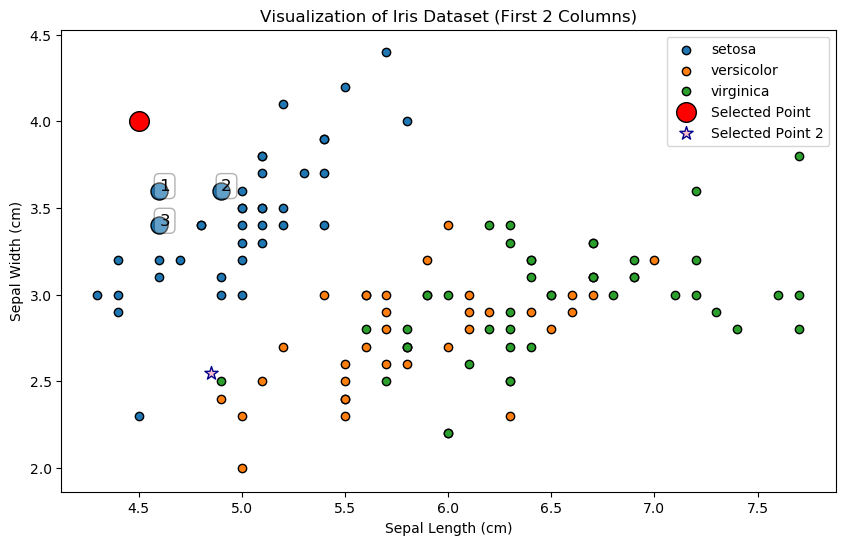

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two columns for visualization
y = iris.target
class_names = iris.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the selected point (4.5, 4) for demonstration
selected_point = np.array([4.5, 4])

# Find indices of the three closest points to the selected point in X_train
distances = np.sqrt(np.sum((X_train - selected_point)**2, axis=1))
closest_indices = np.argsort(distances)[:3]
closest_points = X_train[closest_indices]

# Plot all points in X_train and the selected point
plt.figure(figsize=(10, 6))

# Plot all points in X_train by class name
for class_label in np.unique(y_train):
    plt.scatter(X_train[y_train == class_label, 0], X_train[y_train == class_label, 1], label=f'{class_names[class_label]}', edgecolors='k')

# Plot the selected point
plt.scatter(selected_point[0], selected_point[1], color='red', marker='o', s=200, label='Selected Point', edgecolors='k')

# Plot the closest points in X_train and label them with numbers
for i, (point, index) in enumerate(zip(closest_points, closest_indices)):
    plt.text(point[0], point[1], str(i+1), \
             fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3' , alpha = 0.3))
    plt.scatter(point[0], point[1], color=plt.cm.tab10(y_train[index]), marker='o', s=150, edgecolors='k')


plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.scatter(4.85, 2.55 , color='pink', marker='*', s=100, label='Selected Point 2', edgecolors='darkblue')
plt.title('Visualization of Iris Dataset (First 2 Columns)')
plt.legend()

plt.show()


In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
# 80% of the data is used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate the Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN classifier function
def knn(X_train, y_train, X_test, k):
    y_pred = []  # List to store predictions for the test set
    for test_point in X_test:
        # Calculate the distance from the test point to all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        
        # Get the indices of the k nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]
        
        # Get the labels of the k nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_nearest_indices]
        
        # Use Counter to find the most common class label among the k nearest neighbors
        # Counter returns a dictionary with labels as keys and their counts as values
        most_common = Counter(k_nearest_labels).most_common(1)
        
        # Append the most common class label to the predictions list
        y_pred.append(most_common[0][0])
    
    return np.array(y_pred)

# Define the number of neighbors to consider
k = 3

# Predict the class labels for the test set
y_pred = knn(X_train, y_train, X_test, k)

# Calculate the accuracy of the model
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


<div style="background-color:#e0f7fa; padding: 20px; border: 2px solid #00796b; border-radius: 10px;">

### 📊 <span style="color:#00796b;">Applying KNN on Breast Cancer Dataset</span>

In the following cell, we are going to apply our KNN classification code on the `load_breast_cancer` dataset.

</div>


In [4]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
# 80% of the data is used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the number of neighbors to consider
k = 3

# Predict the class labels for the test set
y_pred = knn(X_train, y_train, X_test, k)

# Calculate the accuracy of the model
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.98%


<div style="background-color:#fff8f0; padding: 20px; border: 2px solid #ff6347; border-radius: 10px;">

### 🕒 **Important Notes About KNN Model**

**K-Nearest Neighbors (KNN)** is a widely used algorithm for classification and regression tasks. However, it's important to note the following:

1. **Time-Consuming for Large Datasets**:
   - KNN can be computationally expensive, especially as the size of the dataset grows.
   - This is because the algorithm requires storing all the training data and calculating distances between the query point and every point in the training set for each prediction.
   - As a result, the time required to make predictions increases linearly with the size of the dataset.

2. **Memory Usage**:
   - Since KNN relies on the entire training dataset for making predictions, it can also be memory-intensive.

3. **Scalability Issues**:
   - For very large datasets, the process of computing distances for each prediction can become impractical.
   - Various techniques, such as approximate nearest neighbors or dimensionality reduction, can be employed to mitigate these issues.

Understanding these limitations is crucial when applying KNN to large-scale problems. Alternatives like decision trees, support vector machines, or neural networks may offer more scalable solutions.

</div>


<div style="background-color:#fff8f0; padding: 20px; border: 2px solid #ff6347; border-radius: 10px;">

### 📏 **Understanding the Value of K in KNN**

In the K-Nearest Neighbors (KNN) algorithm, **K** is a crucial <span style="color:#ff4500; font-weight: bold;">hyperparameter</span> that significantly influences the model's performance. Here’s a brief overview:

1. **What is K?**:
   - **K** represents the number of nearest neighbors used to make the classification or regression decision for a given query point.

2. **Impact of K**:
   - Consider the star-shaped selected point shown in the graph above:
     - **When K = 1**: The class of the selected point will be determined solely by its nearest neighbor. In this case, the closest neighbor is of the class **Virginica**, so the selected point will be classified as **Virginica**.
     - **When K = 3**: The class of the selected point is determined by the majority class among its three nearest neighbors. In this example, two out of the three nearest neighbors are of the class **Versicolor**, so the selected point will be classified as **Versicolor**.

3. **Choosing the Best K**:
   - The choice of **K** can affect the model's accuracy and generalization. A very small **K** (like 1) can make the model sensitive to noise, while a very large **K** can smooth out the decision boundary too much, potentially leading to underfitting.
   - Therefore, selecting the optimal **K** is essential for balancing bias and variance.

4. **<span style="color:#ff4500; font-weight: bold;">Hyperparameters</span> and Future Lessons**:
   - **K** is the <span style="color:#ff4500; font-weight: bold;">hyperparameter</span> in the KNN model, and tuning it appropriately is crucial for achieving the best performance.
   - In upcoming lessons, we will explore <span style="color:#ff4500; font-weight: bold;">hyperparameters</span> in more detail, including methods for selecting and tuning them to optimize model performance.

Stay tuned to learn more about how to effectively choose and adjust <span style="color:#ff4500; font-weight: bold;">hyperparameters</span> to improve your model’s accuracy and efficiency.

</div>
